In [1]:
import os
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv("C:/Users/abarn/Downloads/CRS/Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pomegranate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [5]:
df['label'].value_counts()

pomegranate    100
papaya         100
rice           100
apple          100
muskmelon      100
cotton         100
watermelon     100
banana         100
grapes         100
mungbean       100
mothbeans      100
orange         100
blackgram      100
mango          100
kidneybeans    100
lentil         100
chickpea       100
pigeonpeas     100
coffee         100
jute           100
maize          100
coconut        100
Name: label, dtype: int64

<AxesSubplot:>

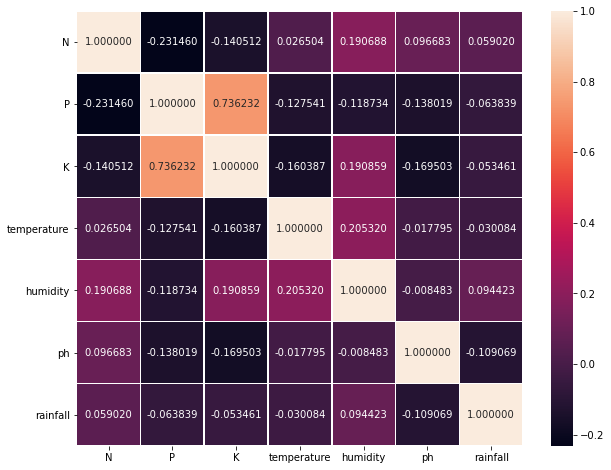

In [6]:
correlation_mat = df.corr()
correlation_mat
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, linewidths=.5,annot=True, fmt="f")

In [7]:
X = df.iloc[:,:-1]    
y = df.iloc[:,-1]

In [8]:
# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


In [10]:
KNN_model = KNeighborsClassifier()

In [11]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred = KNN_model.predict(X_test)


In [13]:
results = classification_report(y_test, y_pred)
print(results)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

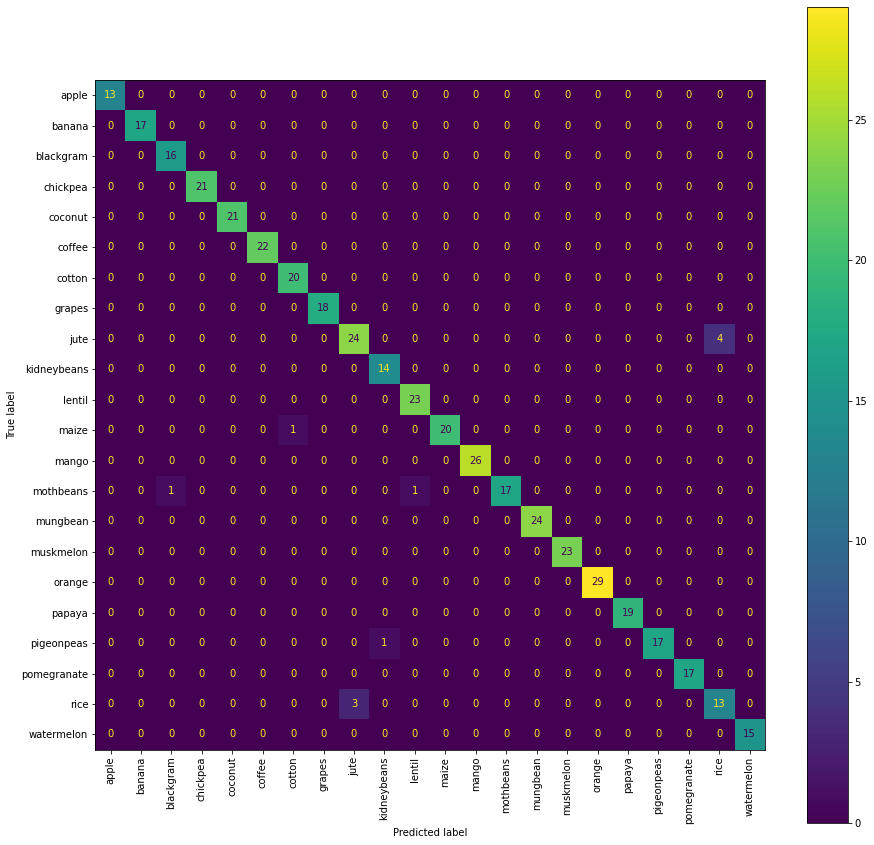

In [14]:
conf_mat = confusion_matrix(y_test, y_pred, labels=KNN_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=KNN_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical') 

In [15]:
rice_df = df[df["label"] == 'rice']
jute_df = df[df["label"] == 'jute']
df_rice_jute = pd.concat([rice_df, jute_df])

In [17]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
    for col in df.columns[:-1]:
        fig, ax = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios': [3.5, 0.5]})
        sns.barplot(x = df['label'], y = df[col], data=df, ax = ax[0])
        sns.barplot(x = df_rice_jute['label'], y = df_rice_jute[col], data=df_rice_jute, ax = ax[1])
        change_width(ax[1], 0.5)
        fig.autofmt_xdate(rotation=60)
        plt.show()

In [18]:
# open a file, where you ant to store the data
file = open('KNN_model_crop_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(KNN_model, file)